# Clustering Crypto

In [28]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [ ]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [ ]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [5]:
# Alternatively, use the provided csv file:
from pathlib import Path
file_path = Path("Resources/crypto_data.csv")

df_crypto = pd.read_csv(file_path, index_col=0)
df_crypto.head()



,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Preprocessing

In [ ]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
#df_crypto = df_crypto[['CoinName', 'Algorithm', 'IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']]

In [6]:
# Keep only cryptocurrencies that are trading
df_crypto = df_crypto[df_crypto['IsTrading'] ==True]
df_crypto.head(150)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [7]:
# Keep only cryptocurrencies with a working algorithm
df_crypto=df_crypto[df_crypto["Algorithm"] !="NA"]
df_crypto.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [8]:
# Remove the "IsTrading" column
df_crypto.drop("IsTrading", axis=1, inplace=True)
df_crypto.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [9]:
# Remove rows with at least 1 null value
df_crytpo = df_crypto.dropna(axis=0)
df_crytpo.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [10]:
# Remove rows with cryptocurrencies having no coins mined
df_crytpo = df_crypto[df_crypto['TotalCoinsMined'] >0]
df_crytpo.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [11]:
# Drop rows where there are 'N/A' text values
df_crypto = df_crypto[df_crypto.iloc[:] != "NA"].dropna()
df_crytpo.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [12]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
df_CoinName = pd.DataFrame(df_crypto["CoinName"], index=df_crypto.index)
df_CoinName.head(10)

,CoinName
42,42 Coin
404,404Coin
808,808
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
LTC,Litecoin
DASH,Dash
XMR,Monero
ETC,Ethereum Classic


In [13]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
df_crypto = df_crypto.drop("CoinName", axis=1)
df_crypto.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [14]:
# Create dummy variables for text features
dummy = pd.get_dummies(data=df_crypto, columns=["Algorithm", "ProofType"])
dummy.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standardize data
from sklearn.preprocessing import StandardScaler
dummy = StandardScaler().fit_transform(dummy)

### Reducing Dimensions Using PCA

In [16]:
# Use PCA to reduce dimensions to 3 principal components
n_comp = 3
crypto_pca = PCA(n_components=n_comp)
principal_components = crypto_pca.fit_transform(dummy)
principal_components

array([[-0.25207366,  1.28340267, -0.33662083],
       [-0.23756978,  1.28251223, -0.33719446],
       [-0.13518099,  0.81837712, -0.29467212],
       ...,
       [-0.09400039, -2.3047805 ,  0.1540388 ],
       [-0.28465121, -1.99974562,  0.21008209],
       [-0.12384594,  0.80808222, -0.08009311]])

In [19]:
# Create a DataFrame with the principal components data
col_names = [f"Comp {i}" for i in range(1, n_comp + 1)]
df_pca = pd.DataFrame(principal_components, columns=col_names, index=df_crypto.index)
print(df_pca.shape)
df_pca.head(10)

(685, 3)


,Comp 1,Comp 2,Comp 3
42,-0.252074,1.283403,-0.336621
404,-0.237570,1.282512,-0.337194
808,-0.135181,0.818377,-0.294672
1337,0.286310,1.976827,-0.489411
BTC,-0.173166,-1.473276,0.056423
ETH,-0.239738,-2.160771,0.153882
LTC,-0.289439,-1.008289,0.014450
DASH,-0.220726,1.438923,-0.445364
XMR,-0.256397,-2.228265,0.213412
ETC,-0.239660,-2.160776,0.153879


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

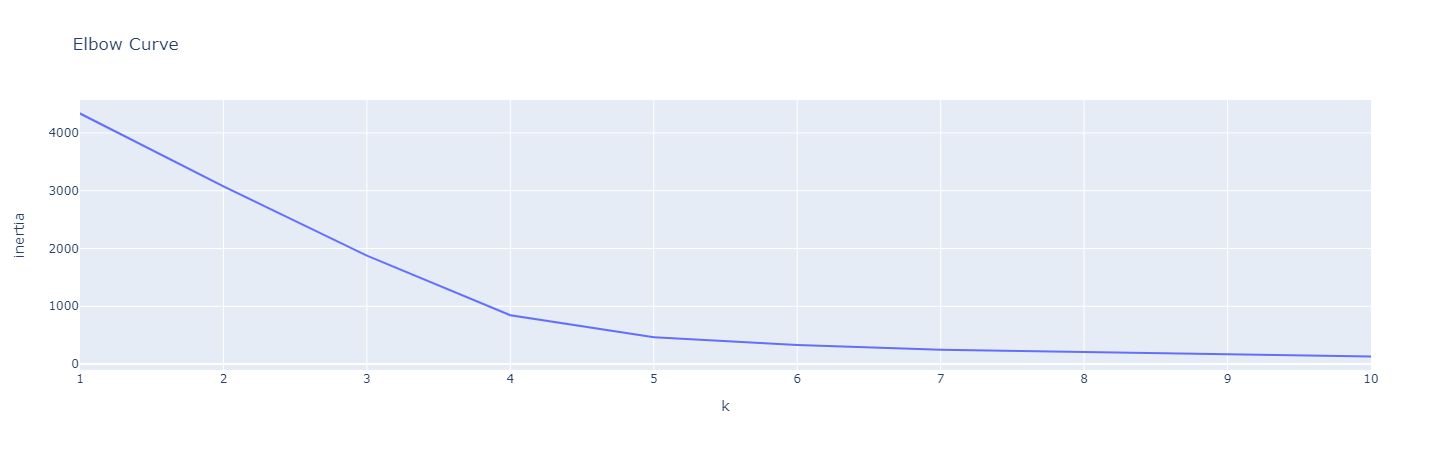

In [78]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(df_pca)
    inertia.append(kmean.inertia_)
#print(inertia)

# Create the Elbow Curve using hvPlot - used Plotly as hvplot not working in this environment
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

elbow_fig = px.line(df_elbow, x="k", y="inertia", title="Elbow Curve")
elbow_fig.show()

Running K-Means with `k=<your best value for k here>`

In [66]:
# Initialize the K-Means model
k_model = KMeans(n_clusters=4, random_state=0)

# Fit the model
k_model.fit(df_pca)

# Predict clusters
predictions = k_model.predict(df_pca)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
df_cluster = pd.concat([df_crypto, df_pca], axis=1, sort=False)
df_cluster["CoinName"] = df_CoinName["CoinName"]
df_cluster["Class"] = k_model.labels_
df_cluster.head(10)



,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Comp 1,Comp 2,Comp 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.252074,1.283403,-0.336621,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.237570,1.282512,-0.337194,404Coin,1
808,SHA-256,PoW/PoS,0.000000e+00,0,-0.135181,0.818377,-0.294672,808,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.286310,1.976827,-0.489411,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.173166,-1.473276,0.056423,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.239738,-2.160771,0.153882,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.289439,-1.008289,0.014450,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.220726,1.438923,-0.445364,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.256397,-2.228265,0.213412,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.239660,-2.160776,0.153879,Ethereum Classic,0


### Visualizing Results

#### 3D-Scatter with Clusters

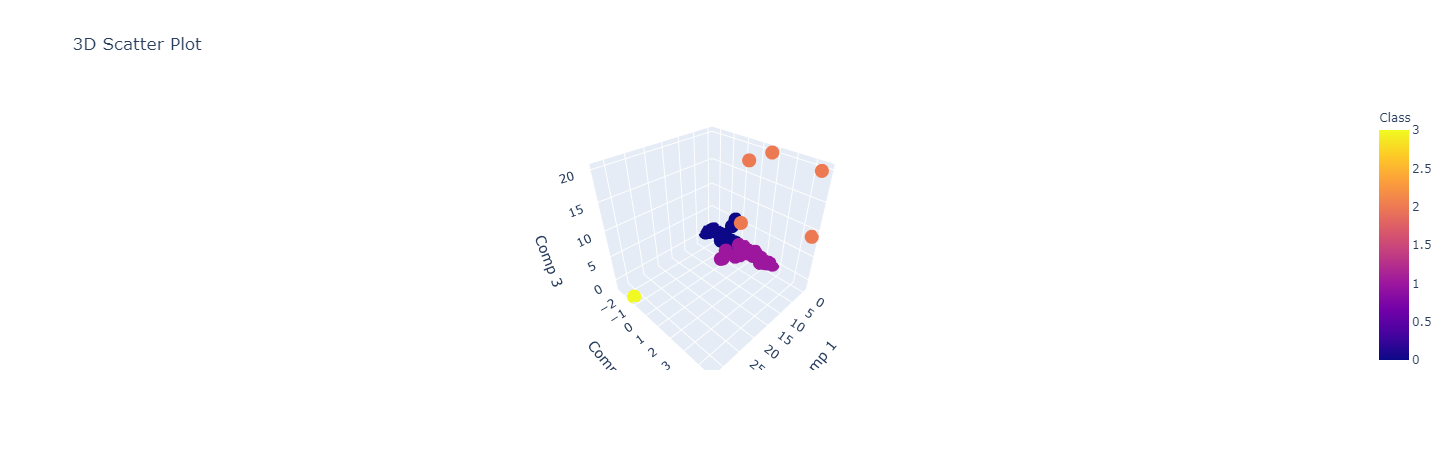

In [64]:
# Create a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(df_cluster, x='Comp 1', y='Comp 2', z='Comp 3',
              color='Class', title="3D Scatter Plot", size_max=30,)
fig.show()


#### Table of Tradable Cryptocurrencies

In [51]:
# Table with tradable cryptos
with pd.option_context("display.max_rows", None, "display.max_columns", None):
        display(df_cluster[
        ["CoinName",
         "Algorithm",
         "TotalCoinSupply",
         "TotalCoinsMined",
         "Class",
        ]]
    )


,CoinName,Algorithm,TotalCoinSupply,TotalCoinsMined,Class
42,42 Coin,Scrypt,42,4.199995e+01,1
404,404Coin,Scrypt,532000000,1.055185e+09,1
808,808,SHA-256,0,0.000000e+00,1
1337,EliteCoin,X13,314159265359,2.927942e+10,1
BTC,Bitcoin,SHA-256,21000000,1.792718e+07,0
ETH,Ethereum,Ethash,0,1.076842e+08,0
LTC,Litecoin,Scrypt,84000000,6.303924e+07,0
DASH,Dash,X11,22000000,9.031294e+06,1
XMR,Monero,CryptoNight-V7,0,1.720114e+07,0
ETC,Ethereum Classic,Ethash,210000000,1.133597e+08,0


#### Scatter Plot with Tradable Cryptocurrencies

In [85]:
# Scale data to create the scatter plot
#scaler = StandardScaler()
#scatter_data = scaler.fit_transform(df_cluster[["TotalCoinsMined", "TotalCoinSupply"]])

mm_scaler = MinMaxScaler()
scatter_data = mm_scaler.fit_transform(df_cluster[["TotalCoinsMined", "TotalCoinSupply"]])

scatter_df= pd.DataFrame(scatter_data, columns=["TotalCoinsMined", "TotalCoinSupply"], index=df_cluster.index)
scatter_df["CoinName"] = df_cluster["CoinName"]
scatter_df["Class"] = df_cluster["Class"]
scatter_df.head()

,TotalCoinsMined,TotalCoinSupply,CoinName,Class
42,0.005942,4.553649e-16,42 Coin,1
404,0.007002,5.767956e-09,404Coin,1
808,0.005942,0.000000e+00,808,1
1337,0.035342,3.406122e-06,EliteCoin,1
BTC,0.005960,2.276825e-10,Bitcoin,0


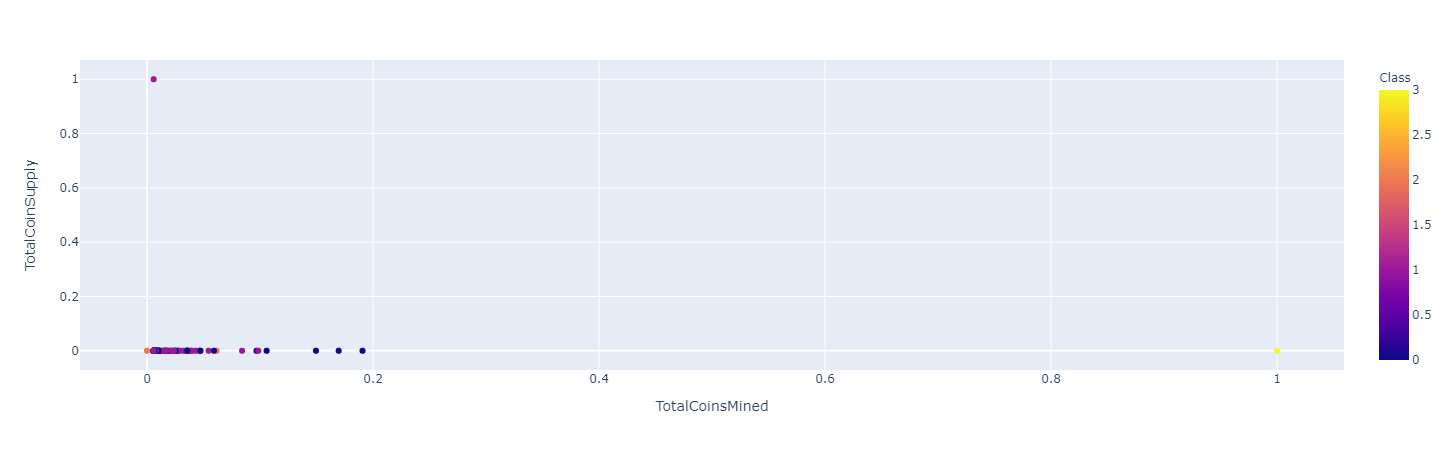

In [86]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
scatt_fig = px.scatter(scatter_df, 
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    color="Class",)  

scatt_fig.show()